In [1]:
# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [2]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 1. Data Exploration and Preprocessing:

In [4]:
df=pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
# checking for missing values:
# There are no missing values so need for imputation or removal
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.info()
# 6 numerical columns with int64 dtype and 9 categorical columns with object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Scaling to numerical features:

In [10]:
# making a df only for numerical features
numdf=df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
numdf.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


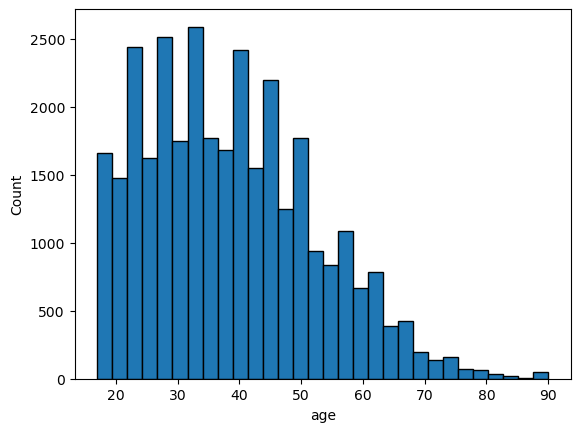

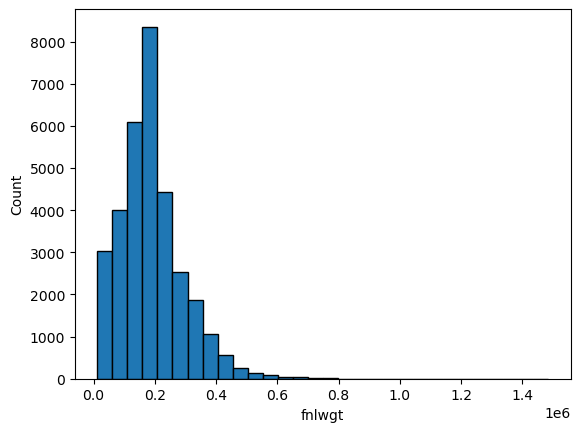

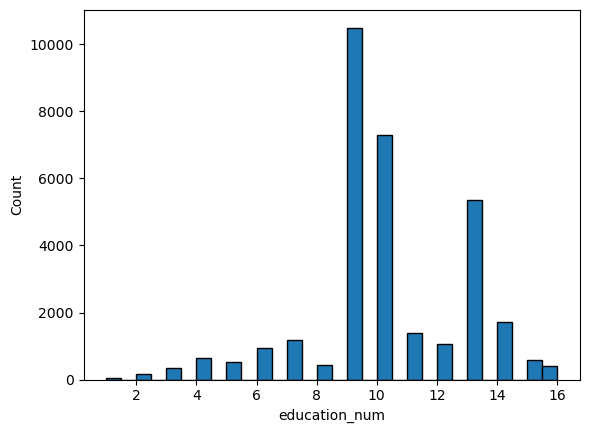

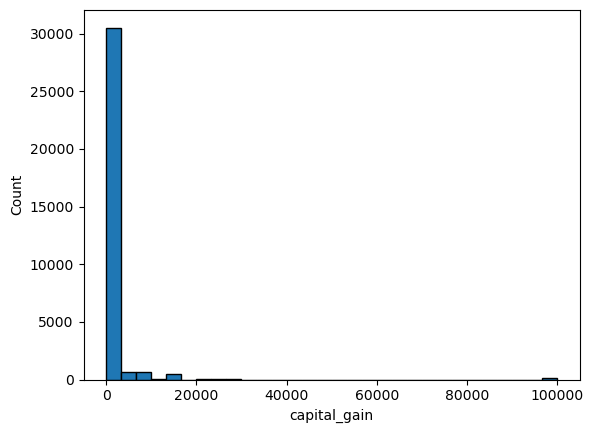

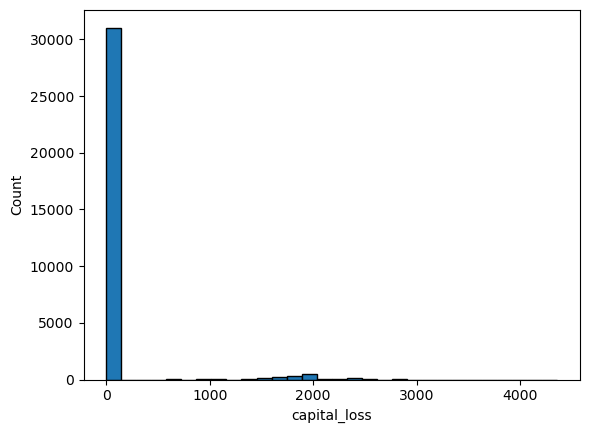

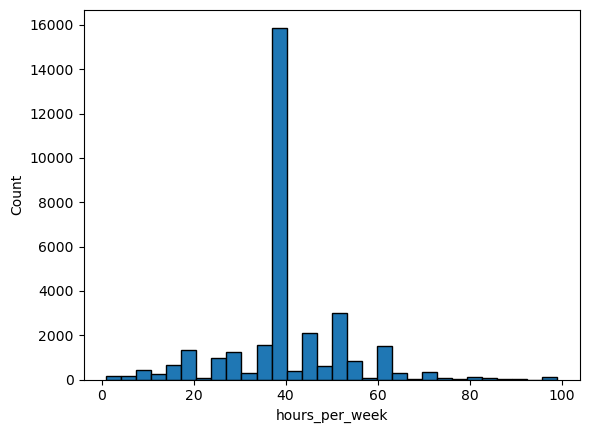

In [11]:
#Histplots for all the numerical variables:
for i in numdf.columns:
    plt.hist(df[i],edgecolor='black',bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

In [12]:
# using standard scaler:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
sc.fit(numdf)

StandardScaler()

In [14]:
scalednum=sc.transform(numdf)
scalednum

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [15]:
# dataframe of features scaled using standard scaler:
scalednumdf=pd.DataFrame(scalednum,columns=numdf.columns)
scalednumdf.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [16]:
# using minmax scaler:

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mmsc=MinMaxScaler()
mmsc.fit(numdf)

MinMaxScaler()

In [19]:
scalednum2=mmsc.transform(numdf) 
scalednum2

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [20]:
# datafram of features scaled using minmax scaler:
scalednum2df=pd.DataFrame(scalednum2,columns=numdf.columns)
scalednum2df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [21]:
# When to use minmax and standard scaler:

# 1. MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to 
# transform a feature, as it will preserve the shape of the dataset (no distortion).
# 2. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling 
# compress all inliers in the narrow range [0, 0.005] for the transformed number of households.


# 1. StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by 
# subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.
# 2. StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and 
# standard deviation which shrink the range of the feature values as shown in the left figure below. Note in particular that because the outliers on each 
# feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for 
# the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed number of households.
# StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.


In [22]:
# By looking at the data we have most of the numerical features have a positively skewed distribution rather than a normal distribution.
# Hence it is optimal to use minmax scaler for the given dataset compared to the standard scaler.

In [23]:
# 2. Encoding Techniques:

In [24]:
# cat columns with atmost 5 categories for one-hot encoding:
ohelist=[]
for i in df.columns:
    unique_values = len(df[i].unique())
    if unique_values<=5:
        ohelist.append(i)

In [25]:
ohelist=['race','sex','income']
ohelist

['race', 'sex', 'income']

In [26]:
for i in df.columns:
    unique_values = len(df[i].unique())
    print(f'{i}:{unique_values}')

age:73
workclass:9
fnlwgt:21648
education:16
education_num:16
marital_status:7
occupation:15
relationship:6
race:5
sex:2
capital_gain:119
capital_loss:92
hours_per_week:94
native_country:42
income:2


In [27]:
# Features for label encoding with more than 5 categories:
# workclass:9
# education:16
# marital_status:7
# occupation:15
# relationship:6
# native_country:42
lablist=['workclass','education', 'marital_status', 'occupation','relationship' ,'native_country']

In [28]:
lablist

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'native_country']

In [29]:
#Onehotencoding  the categorical columns with atmost 5 features:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [30]:
# Apply one-hot encoding to the categorical columns
onehotencoded = encoder.fit_transform(df[ohelist])

In [31]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
onehotdf = pd.DataFrame(onehotencoded, columns=encoder.get_feature_names_out(ohelist))

In [32]:
# Concatenate the one-hot encoded dataframe with the original dataframe
encodeddf = pd.concat([df, onehotdf], axis=1)

In [33]:
# Drop the original categorical columns
encodeddf = encodeddf.drop(ohelist, axis=1)

In [34]:
onehotdf.head()

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
# Label encoding for features with more than 5 categories
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [36]:
# Making a copy df from the ohe encoded df:
df2=encodeddf.copy()

In [37]:
# Apply one-hot encoding to the categorical columns lablist
for i in lablist:
    df2[i] = le.fit_transform(df2[i])
    print(df2[i].unique())

[7 6 4 1 2 0 5 8 3]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
[4 2 0 3 5 1 6]
[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
[1 0 5 3 4 2]
[39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]


In [38]:
# Dataframe with both ohe and label encoding applied:
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,0,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,0,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,0,0,...,39,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,0,0,...,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,39,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32557,40,4,154374,11,9,2,7,0,0,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32558,58,4,151910,11,9,6,1,4,0,0,...,39,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32559,22,4,201490,11,9,4,1,3,0,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [39]:
# OHE vs Label encoding:

# OHE:
# Ohe creates additional features with the different categories of the current feature as the labels and assign a numerical value to each of these new features.
# One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique 
# values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy 
# variables.

# Challenges of One-Hot Encoding: Dummy Variable Trap:
# One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables. 
# Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

# Label Encoding:
# Label Encoding is a common technique for converting categorical variables into numerical values. Each unique category value is assigned a unique integer 
# based on alphabetical or numerical ordering. These modify the current feature rather than creating new features like the one hot encoder.

# Challenges with Label Encoding:
# Label encoding imposes an arbitrary order on categorical data, which can be misleading. In the given example, the countries have no inherent order, but 
# one hot encoding and label encoding introduces an ordinal relationship based on the encoded integers (e.g., France < Germany < Spain). This can cause the 
# model to falsely interpret these categories as having a meaningful order, potentially leading to incorrect inferences.

In [40]:
# 3. Feature Engineering:

In [41]:
# 1. New Feature Between Education Level and Hours Per Week:

# Reason:
# The level of education and the number of hours worked per week can jointly influence income levels. For example, highly educated individuals working 
# more hours may have higher incomes compared to less educated individuals working the same number of hours.

In [42]:
# Create the feature  between education level and hours per week on encoded dataframe df2:
df2['education_hours'] = df2['education_num'] * df2['hours_per_week']
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,education_hours
0,39,7,77516,9,13,4,1,1,2174,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,520
1,50,6,83311,9,13,2,4,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169
2,38,4,215646,11,9,0,6,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,360
3,53,4,234721,1,7,2,6,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,280
4,28,4,338409,9,13,2,10,5,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,520


In [43]:
# 2. New Feature Betweeen Capital Gains and Losses Net:

# Reason:
# The dataset contains separate features for capital_gain and capital_loss. Combining these into a single feature that represents net capital gain or loss 
# can simplify the model and potentially enhance its predictive power.

In [44]:
# Create the feature  between  capital_gain and capital_loss on encoded dataframe df2:
df2['net_capital'] = df2['capital_gain'] - df2['capital_loss']
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,education_hours,net_capital
0,39,7,77516,9,13,4,1,1,2174,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,520,2174
1,50,6,83311,9,13,2,4,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169,0
2,38,4,215646,11,9,0,6,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,360,0
3,53,4,234721,1,7,2,6,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,280,0
4,28,4,338409,9,13,2,10,5,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,520,0


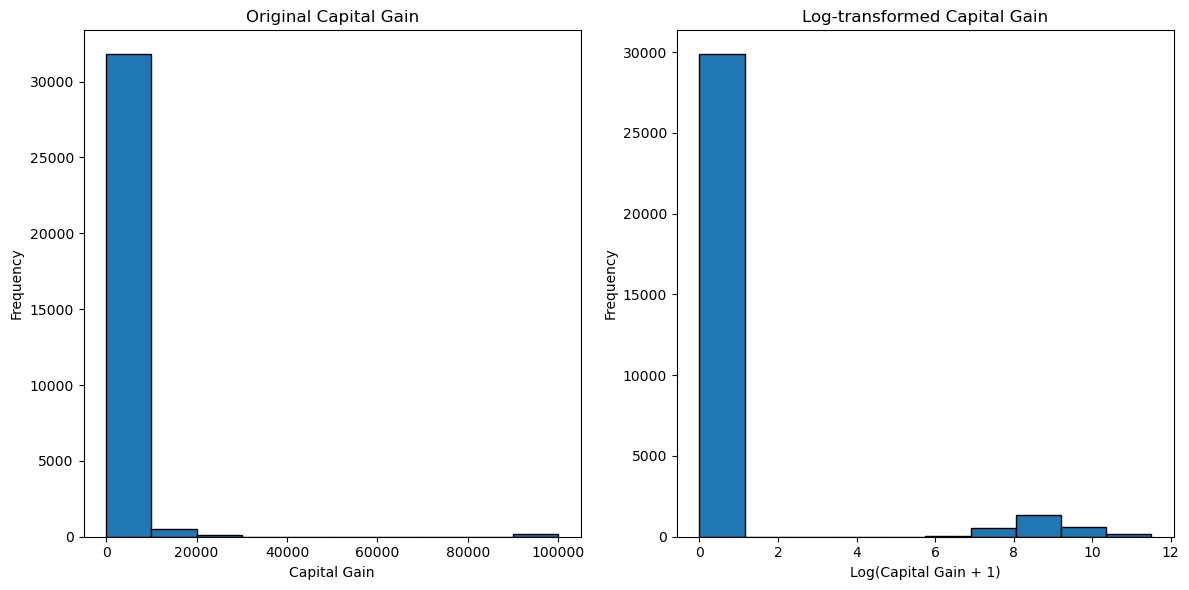

In [45]:
# We do a log transformation on the capital_gain variable as it has a positively skewed distribution:
# Log transformation (adding 1 to avoid log(0) which is undefined)
df['log_capital_gain'] = np.log(df['capital_gain'] + 1)

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for original capital_gain
plt.subplot(1, 2, 1)
plt.hist(df['capital_gain'], bins=10, edgecolor='black')
plt.title('Original Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

# Histogram for log-transformed capital_gain
plt.subplot(1, 2, 2)
plt.hist(df['log_capital_gain'], bins=10, edgecolor='black')
plt.title('Log-transformed Capital Gain')
plt.xlabel('Log(Capital Gain + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
# 4. Feature Selection:

In [47]:
# Isolation forest on all numerical variables:
from sklearn.ensemble import IsolationForest
# Select columns for outlier detection
columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
data = df[columns]

In [48]:
# Initialize and fit Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=23)
df['outlier'] = iso_forest.fit_predict(data)

In [49]:
# Remove outliers
df_no_outliers = df[df['outlier'] == 1].drop('outlier', axis=1)

In [50]:
# Display DataFrame with no outlier:
df_no_outliers.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,log_capital_gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.000000


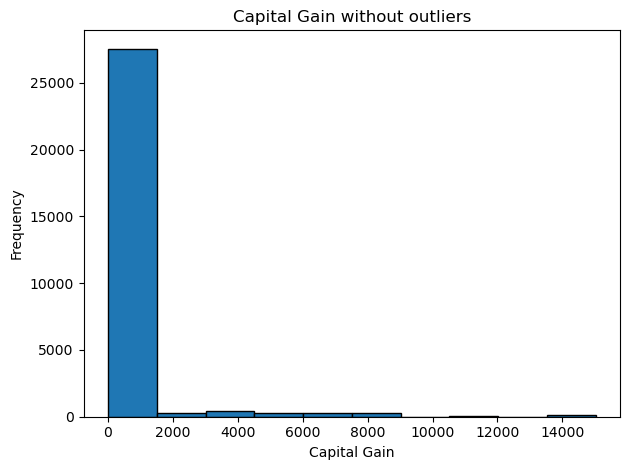

In [51]:
# histplot for capital_gain variable without outliers:
plt.hist(df_no_outliers['capital_gain'], bins=10, edgecolor='black')
plt.title('Capital Gain without outliers')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [52]:
# How Outliers Can Affect Model Performance:

# Outliers can significantly impact the performance of machine learning models in various ways:

#     Biasing the Model: Outliers can skew the distribution of data and lead the model to learn incorrect patterns. This can cause the model to be biased 
#     towards outlier values, resulting in poor generalization to new data.

#     Affecting Mean and Variance: Many models, such as linear regression, are sensitive to the mean and variance of the data. Outliers can inflate these 
#     statistics, leading to distorted model parameters and predictions.

#     Increasing Model Complexity: Some models may become overly complex in an attempt to fit outliers, resulting in overfitting. This means the model 
#     performs well on the training data but poorly on unseen data.

#     Influencing Loss Functions: Outliers can have a disproportionate effect on loss functions, especially those that are sensitive to large errors, such 
#     as Mean Squared Error (MSE). This can lead to suboptimal model training and parameter estimation.

In [53]:
 pip install --upgrade pandas

In [54]:
 pip install ppscore

In [55]:
# PPS score: on the numerical columns (data)
import ppscore as pps
# Compute the PPS Matrix
pps_matrix = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [56]:
# Compute the Correlation Matrix
correlation_matrix = data.corr()

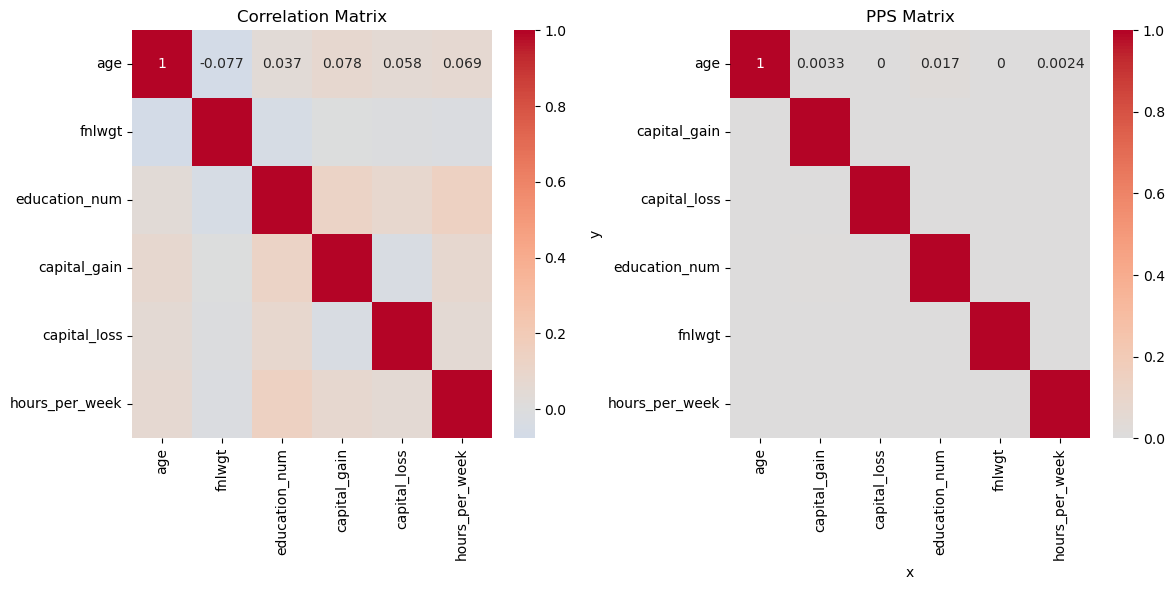

Correlation Matrix:
                      age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education_num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital_gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital_loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours_per_week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours_per_week  
age                   0.068756  
fnlwgt               -0.018768  
education_num         0.148123  
capital_gain          0.078409  
capital_loss          0.054256  
hours_per_week        1.000000  

PPS Matrix:
 x               age  capital_gain  capital_loss  education_num  fnlwgt  \
y                                                                        
age             1.

In [57]:
# Plot the Correlation Matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# Plot the PPS Matrix
plt.subplot(1, 2, 2)
sns.heatmap(pps_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('PPS Matrix')

plt.tight_layout()
plt.show()

# Display the matrices
print("Correlation Matrix:\n", correlation_matrix)
print("\nPPS Matrix:\n", pps_matrix)

In [58]:
# Conclusion:
# Have finished all the tasks given.